#  LINEAR REGRESSION USING GRADIENT DESCENT

The code implements Linear Regression using Gradient Descent. It includes two sections: a simple linear regression example and linear regression on housing data.Both examples demonstrate the training process of linear regression models using gradient descent.
The plots illustrate the learning process by showing the regression line and the decreasing loss over epochs.
These implementations serve as educational examples of how gradient descent is applied for linear regression problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

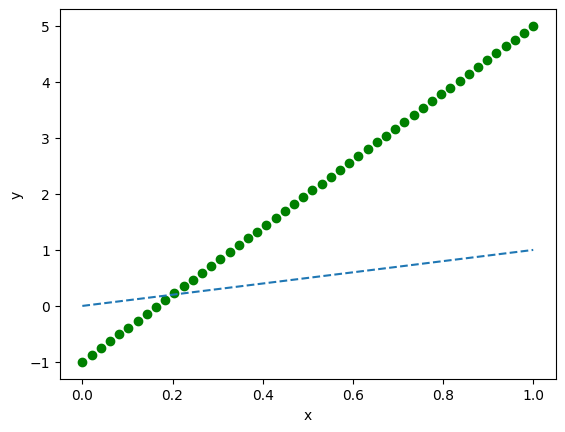

In [2]:
x = ((np.linspace(-1,5,50))*1000)
y=np.linspace(-1,5,50)
a=min(x)
b=max(x)
x_norm=[]
for i in range (0,50):
    c=(x[i]-a)/(b-a)
    x_norm.append(c)
x_norm=np.array(x_norm)    
plt.scatter(x_norm,y,color = "green")
plt.plot(x_norm,x_norm,'--')
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

In [3]:
# Mean square error
def mse(yt,yp):
    return np.mean((yt-yp)**2) / 2

def update(yt,yp,x,lr,m,c):
    m = m - (-1)*lr*np.mean((yt-yp)*x)
    c = c - (-1)*lr*np.mean(yt-yp)

    return m,c

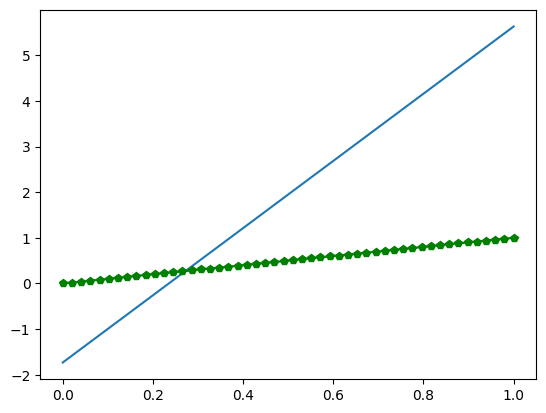

TOTAL LOSS RANGE  0.08183073320016998 - 5.193877551020408
SLOPE 7.353788492022703
INERCEPT -1.726576563210675


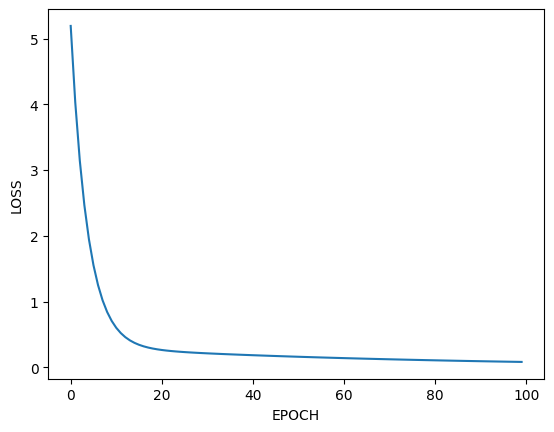

In [4]:
m,c = 10,0
lr = 0.1
total_loss = []
for i in range(100):
    yp = m*x_norm + c    
    loss = mse(y,yp)
    total_loss.append(loss)
    m,c = update(y,yp,x_norm,lr,m,c)
plt.plot(x_norm,yp)
plt.plot(x_norm,x_norm,color='green',marker='p')
plt.show()
plt.plot(total_loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
print(f"TOTAL LOSS RANGE ",total_loss[-1],"-", total_loss[0])
print(f"SLOPE",m)
print(f"INERCEPT",c)


# LINEAR REGRESSION ON HOUSING DATA USING GRADIENT DESCENT

Test Loss: 0.5605576503174236


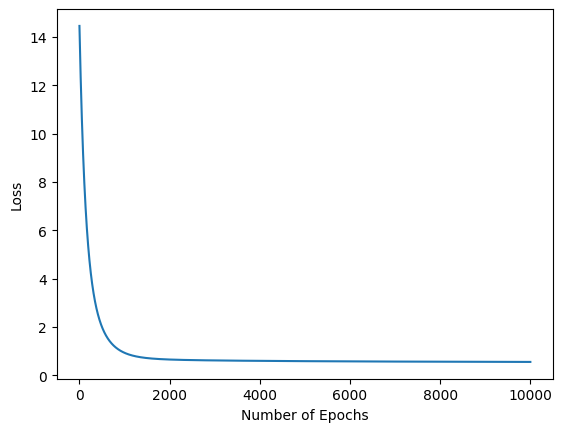

In [40]:
# LINEAR REGRESSION USING GRADIENT DESCENT FOR HOUSING DATA

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing = fetch_california_housing()
X = housing.data
Y = housing.target

X_transform = StandardScaler().fit_transform(X)

# Splitting test and train data
test_train_ratio = 0.2
num_testing_example = int(test_train_ratio * (X.shape[0]))
num_training_example = X.shape[0] - num_testing_example
X_train = X_transform[:num_training_example]
Y_train = Y[:num_training_example]
X_test = X_transform[num_training_example:]
Y_test = Y[num_training_example:]

# Initializing the variables
weight_vector = np.random.randn(X.shape[1])
intercept = 0
learning_rate = 0.001

# Creating the MSE loss function
def loss(y, y_predicted):
    return np.mean((y - y_predicted) ** 2)

# Create function to predict y
def predicted_y(weight, x, intercept):
    return np.dot(x, weight) + intercept

# Create function to differentiate weight
def dldw(x, y, y_predicted):
    return -2 * np.mean(x * (y - y_predicted)[:, np.newaxis], axis=0)

# Create function to differentiate intercept
def dldb(y, y_predicted):
    return -2 * np.mean(y - y_predicted)

# Gradient function
def gradient_descent(x, y):
    weight_vector = np.random.randn(x.shape[1])
    intercept = 0
    epoch = 10000
    linear_loss = []
    learning_rate = 0.001

    for i in range(epoch):
        y_predicted = predicted_y(weight_vector, x, intercept)
        weight_vector = weight_vector - learning_rate * dldw(x, y, y_predicted)
        intercept = intercept - learning_rate * dldb(y, y_predicted)
        linear_loss.append(loss(y, y_predicted))

    plt.plot(np.arange(epoch), linear_loss[:])
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    
    # Predictions on Test Set
    y_pred = predicted_y(weight_vector, X_test, intercept)
    
    # Evaluation
    test_loss = loss(Y_test, y_pred)
    print(f"Test Loss: {test_loss}")

    return weight_vector, intercept

# Run Gradient Descent
w_final, b_final = gradient_descent(X_train, Y_train)
